# Máster Universitario en Lógica, Computación e Inteligencia Artificial
## Aprendizaje Automático
### Cuestionario 5

Germán Lorenz Vieta<br>

Última actualización: 16 de Enero de 2022

En este trabajo analizaremos datos sobre:

Breast Cancer Coimbra (cáncer de mama)

* Tipo de Datos: Multivariate 
* Modo: Classification 
* Tipos: Integer 
* Casos: 116 
* Atributos: 10 
* Año: 2018

El repositorio de la Universidad de California es [datos](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra). 

Las caracteristicas clinicas de interes fueron obtenidas de 64 pacientes con cancer de mama y 52 personas sanas. Los atributos son:

* Edad (años)
* IMC (kg/m2)
* Glucosa (mg / dL)
* Insulina (µU / mL)
* HOMA
* Leptina (ng / mL)
* Adiponectina (µg / mL)
* Resistina (ng / mL)
* MCP-1 (pg / dL)
* Clasificación

## Ejercicio 1

### Item a
Carga del fichero en python y probablemente, eliminación de las filas que no tengan todos los datos. Esto último no se ha visto en clase. Se sugiere mirar la documentación de la librerı́a pandas

Cargamos el archivo <i> dataR2.xlsx </i> con pandas.

In [1]:
import pandas as pd

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

data = pd.read_excel('dataR2.xlsx', header = 0)
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


Verificamos si existen valores nulos en la información proporcionada

In [2]:
nulos = data.isnull().any()
print (nulos)

Age               False
BMI               False
Glucose           False
Insulin           False
HOMA              False
Leptin            False
Adiponectin       False
Resistin          False
MCP.1             False
Classification    False
dtype: bool


No tenemos datos nulos. Si hubieran existido con la función <i> fillna </i> los hubieramos sustituido por ejemplo con la media de la columna agregando un primer sesgo a la información

### Item b
Realiza un pequeño examen exploratorio creando la scatter matrix y el mapa de calor (heatmap) de los coeficientes de correlación de Pearson entre las variables

Verificamos el tipo de dato de cada columna:

In [3]:
data.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

Verificamos los datos del clasificador de pacientes:

In [4]:
pd.unique(data['Classification'])

array([1, 2])

Entonces observemos en mas profundidad los datos:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


Hagamos un estudio estadistico basico:

count    116.000000
mean      57.301724
std       16.112766
min       24.000000
25%       45.000000
50%       56.000000
75%       71.000000
max       89.000000
Name: Age, dtype: float64

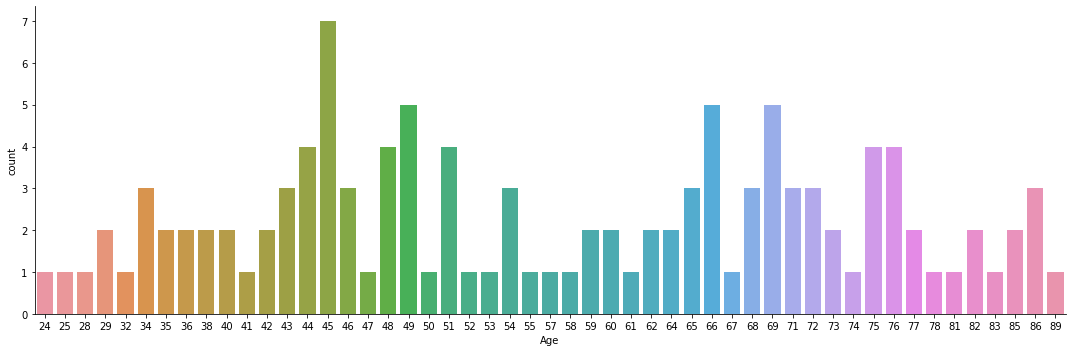

In [6]:
import seaborn as sns
sns.catplot('Age',data=data,kind="count", aspect=3)

data['Age'].describe()

En el estudio hay personas de edad entre `24` y `89` años, siendo los mismos muy heterogeneos y con muestras significativas en algunas edades como `45` y `49` años.

Consideremos entonces que nos muestra la Glucosa:

count    116.000000
mean      97.793103
std       22.525162
min       60.000000
25%       85.750000
50%       92.000000
75%      102.000000
max      201.000000
Name: Glucose, dtype: float64

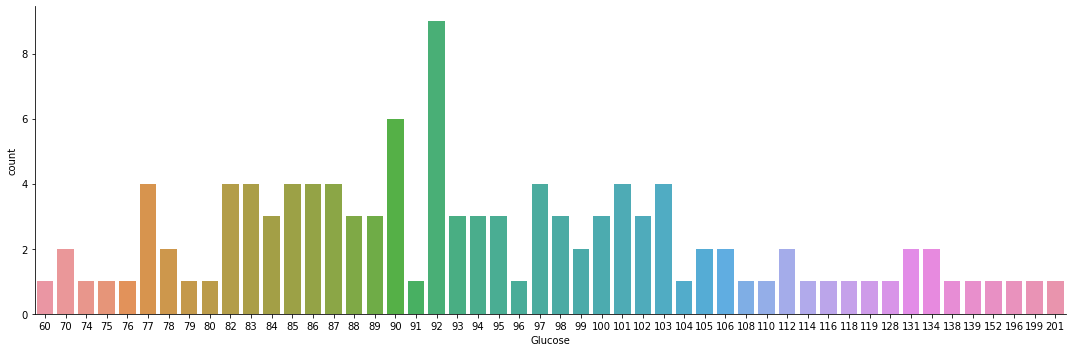

In [7]:
sns.catplot('Glucose',data=data,kind="count", aspect=3)
data['Glucose'].describe()

Se puede observar que el valor común es `92`, teniendo rango entre `60` a `20` mg /dL. Se puede hacer este estudio para el resto de variables pero no se obtienen resultados significantes ya que todas tiene valores casi no repetibles.

Agrupemos el conjunto de datos según la clasificación y ver las características entre personas sanas y personas con cáncer. Veamos sus medias:

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Classification,,,,,,,,,
1,58.076923,28.317336,88.230769,6.933769,1.552398,26.637933,10.328205,11.614813,499.730692
2,56.671875,26.984740,105.562500,12.513219,3.623342,26.596512,10.061167,17.253777,563.016500


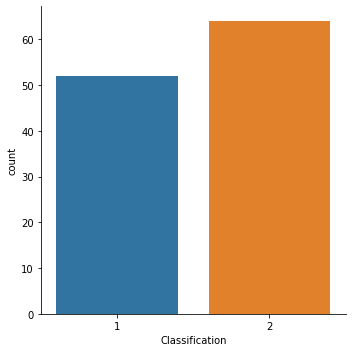

In [8]:
sns.catplot('Classification',data=data,kind="count")

grouped_data = data.groupby('Classification')
grouped_data.mean()

Podemos ver que el grupo 2 toma valores mas altos para la mayoria de indicadores excepto el BMI entre otros.

Definamos el conjunto X de variables predictoras y el conjunto Y de la variable objetivo:

In [9]:
X_data = data.iloc[:,0:9]
X_data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [10]:
import numpy as np 

y_data = np.asarray(data["Classification"]).tolist()
X_names = X_data.columns.tolist()
y_names = ['Sanos', 'Pacientes']

Luego para saber como se distribuyen los datos vamos a usar el método `scatter_matrix`. En color morado corresponden las personas sanas (1) y el color amarillo a los pacientes (2).

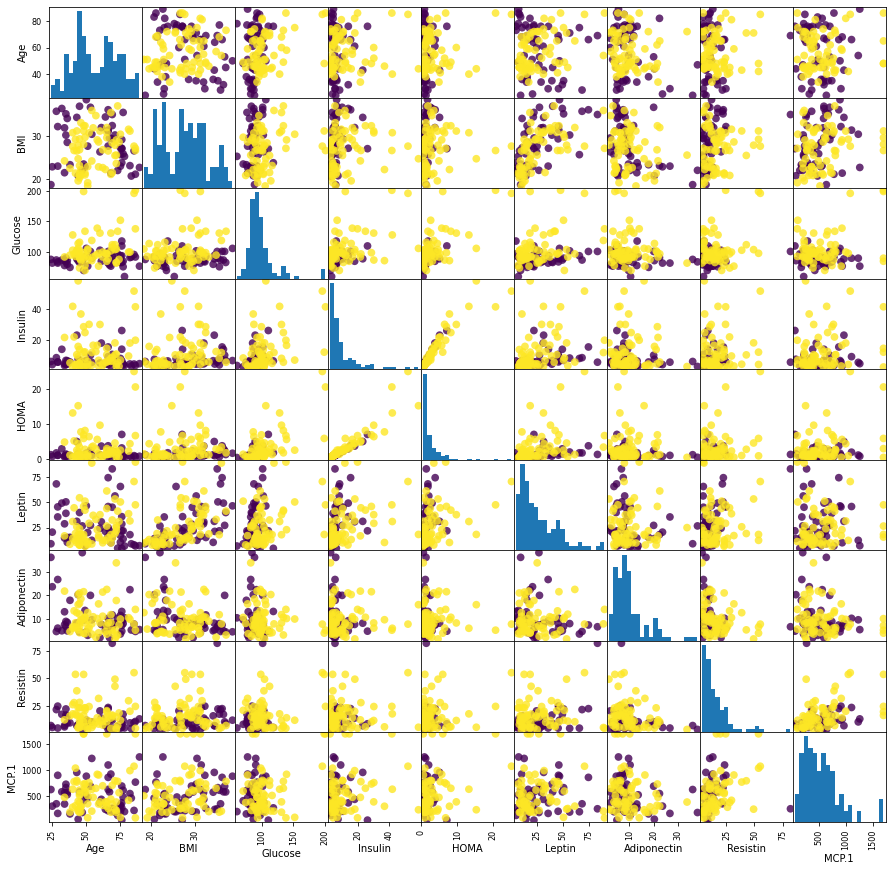

In [11]:
sp = pd.plotting.scatter_matrix(X_data, c=y_data, figsize=(15, 15), 
               marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

La dispersion segun se visualiza es alta asi que la clasificacion sera compleja. Este concepto se puede ver mejor viendo una estimacion sobre como se relacionan las variables usando el coeficiente de correlación de Pearson:

<AxesSubplot:title={'center':'Coeficiente de Correlación de Pearson entre los atributos'}>

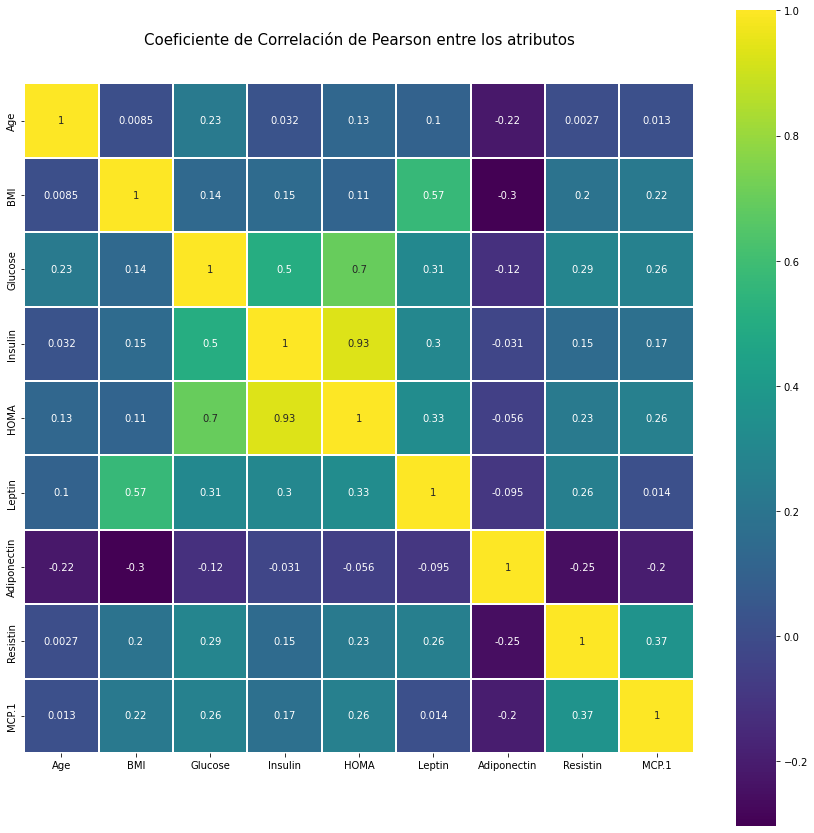

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.title('Coeficiente de Correlación de Pearson entre los atributos', y=1.05, size=15)
sns.heatmap(X_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='viridis', linecolor='white', annot=True)

El coeficiente refleja la poca correlacion que existen entre los datos. Dentro de los que se destacan podemos mencionar a HOMA e insulina asi que podemos hacer un modelo de regresión lineal entre estas dos variables:

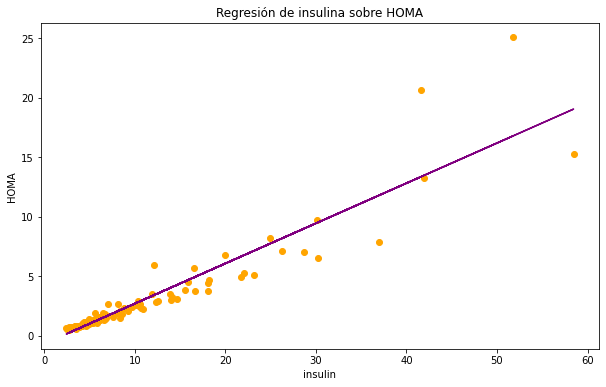

In [13]:
from sklearn import linear_model
import numpy as np

plt.rcParams["figure.figsize"] = (20,3)
insulin = np.asarray(X_data["Insulin"]).reshape(-1,1)
HOMA = X_data['HOMA']


model_lineal = linear_model.LinearRegression()
model_lineal.fit(insulin,HOMA)

y_model_lineal_pred = model_lineal.predict(insulin)
plt.rcParams["figure.figsize"] = (10, 6)
plt.scatter(insulin, HOMA,color='orange')
plt.plot(insulin, y_model_lineal_pred, color='purple')
plt.xlabel('insulin')
plt.ylabel('HOMA')
plt.title('Regresión de insulina sobre HOMA')
plt.show()

### Item c
Divide la base de datos en conjunto de entrenamiento y prueba y crea el correspondiente árbol de decisión sobre le conjunto de entrenamiento.

Dividimos el conjunto de datos en uno formado por el 75% de las observaciones que será el conjunto de entrenamiento y el test que constará del 25% de los datos:

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
  train_test_split(X_data,y_data,test_size = 0.25,
                   random_state=462)

Creamos el arbol correspondiente:

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

Entrenamos el modelo con los datos de entrenamiento y con los parámetros por defecto:

In [16]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

Veamos cuales son las variables de mayor `importancia` en este modelo:

In [17]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
0,Age,0.259
2,Glucose,0.205
1,BMI,0.177
7,Resistin,0.177
5,Leptin,0.078
6,Adiponectin,0.065
8,MCP.1,0.039
3,Insulin,0.000
4,HOMA,0.000


En conclusion las variables de mayor importancia en nuestro modelo son la edad, Glucosa y BMI. La que menos repercusión tiene es Insulina, seguida de HOMA.

### item d
Representa gráficamente el árbol obtenido.

Veamos gráficamente cómo es el árbol obtenido:

In [18]:
from sklearn.tree import export_text
model_text = export_text(model, feature_names=X_names)
print(model_text)

|--- Age <= 37.00
|   |--- class: 1
|--- Age >  37.00
|   |--- Resistin <= 13.25
|   |   |--- Age <= 65.50
|   |   |   |--- Glucose <= 85.00
|   |   |   |   |--- class: 1
|   |   |   |--- Glucose >  85.00
|   |   |   |   |--- BMI <= 33.50
|   |   |   |   |   |--- MCP.1 <= 982.97
|   |   |   |   |   |   |--- Leptin <= 7.24
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Leptin >  7.24
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- MCP.1 >  982.97
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- BMI >  33.50
|   |   |   |   |   |--- class: 1
|   |   |--- Age >  65.50
|   |   |   |--- Glucose <= 122.00
|   |   |   |   |--- Adiponectin <= 28.09
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Adiponectin >  28.09
|   |   |   |   |   |--- class: 2
|   |   |   |--- Glucose >  122.00
|   |   |   |   |--- class: 2
|   |--- Resistin >  13.25
|   |   |--- BMI <= 31.35
|   |   |   |--- Adiponectin <= 2.49
|   |   |   |   |--- Glucose <= 1

La representación grafica del arbol es:

<Figure size 720x432 with 0 Axes>

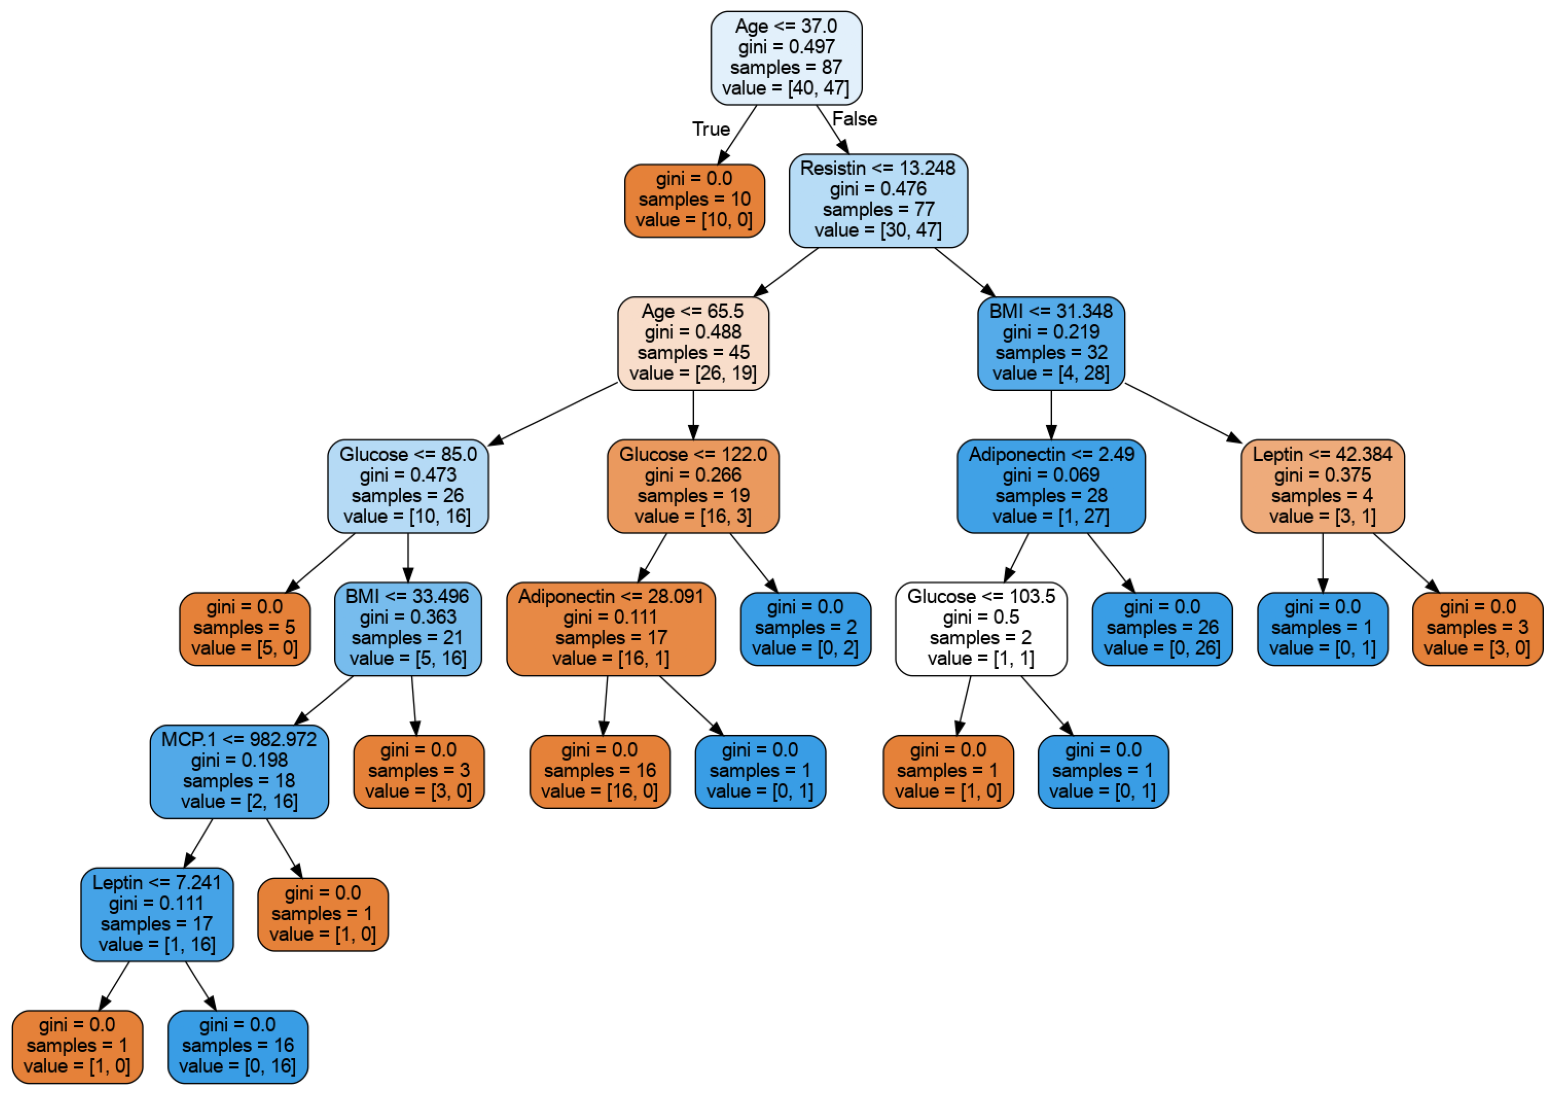

In [19]:
from sklearn.tree import export_graphviz

export_graphviz(
    model,
    out_file="arbol_1.dot",
    feature_names=X_names,
    rounded=True,
    filled=True)
!dot -Tpng arbol_1.dot -o arbol_1.png

plt.clf()
image = plt.imread("arbol_1.png")
height, width, depth = image.shape
dpi = 70
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize).add_axes([0, 0, 1, 1])
plt.axis('off')
plt.imshow(image)
plt.show()

Desde el archivo .dot es:

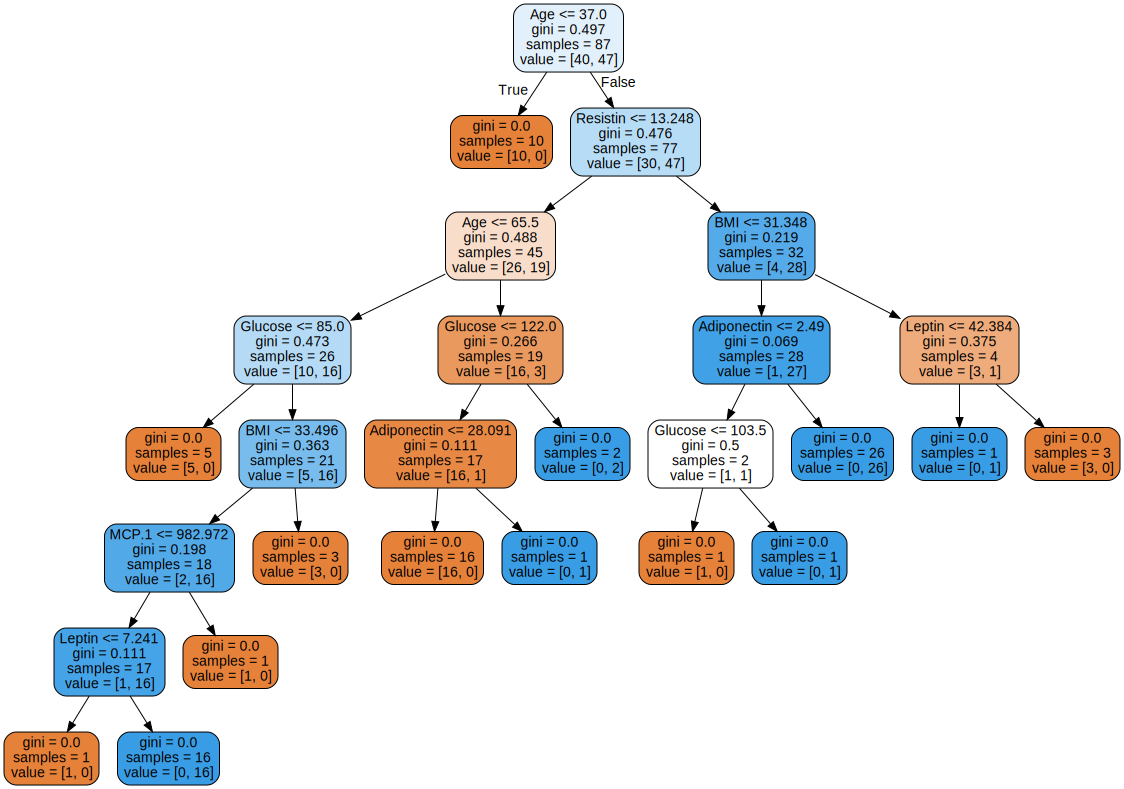

In [20]:
import graphviz

with open("arbol_1.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

Cada nodo interno del árbol anterior muestra información sobre el criterio de separación, el grado de dispersión del nodo, el número de ejemplos del conjunto de entrenamiento asociados a ese nodo y la distribución de valores de clasificación para dichos ejemplos. De esta forma el arbol clasifica todos los ejemplos de nuestro conjunto de entrenamiento.

### item e
Encuentra la media de rendimiento (score) del árbol sobre los conjuntos de entrenamiento, prueba y total.

Vamos a evaluar el rendimiento del árbol  calculando el rendimiento con el conjunto de test, luego para obtener una medida de rendimiento, vamos a comparar estos valores con los reales:

In [21]:
pred = model.predict(X_test)
sum(x1==x2 for x1,x2 in zip(pred,y_test))/len(y_test)

0.7586206896551724

El árbol que hemos construido tiene un acierto de más del `76%`. Veámoslo con mayor precisión:

In [22]:
scores_arbol = model.score(X_test,y_test)
print("Rendimiento en el conjunto de entrenamiento: ",model.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",model.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",model.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.7586206896551724
Rendimiento en el conjunto total:  0.9396551724137931


En el conjunto total tenemos un acierto del `94%` y en el conjunto prueba del `76%`. Veamos las matrices de confusión:

In [23]:
import sklearn.metrics as skm

print('### Matrices de confusión ###\n')
print('Entrenamiento:')
print(skm.confusion_matrix(y_train, model.predict(X_train)))
print('\nPruebas:')
print(skm.confusion_matrix(y_test, model.predict(X_test)))

### Matrices de confusión ###

Entrenamiento:
[[40  0]
 [ 0 47]]

Pruebas:
[[ 9  3]
 [ 4 13]]


En el conjunto de entrenamiento había `40` personas sanas y `47` pacientes con cáncer de mama. El modelo que hemos construido clasifica bien a `9` personas sanas y a `13` personas con cáncer, sin embargo, hay `4` personas a las que ha clasificado de forma incorrecta. Hay `3` personas con cáncer que han sido clasificadas como sanas y `4` sanas clasificadas como pacientes.

## Ejercicio 2

La parte realmente interesante de este cuestionario empieza ahora, donde se espera que el alumno demuestre su autonomı́a y capacidad de profundización en la materia a partir de los conceptos básicos. Se espera que el alumno continúe con el análisis del conjunto de datos y presente el estudio más completo posible. ¿Qué otros métodos podrı́amos utilizar para obtener el mejor árbol de decisión posible?

En este apartado vamos a estudiar distintos modelos y distintas formas para el cálculo del árbol de clasificación. Para cada uno de ellos se calculará la medida de error, comprobando así si dicho modelo mejora o no a los anteriores.

#### Validación cruzada sin estratificación:

Realizaremos una validación cruzada con 10 iteraciones sin estratificación usando como medida <i> accuracy</i>. Para ello se usan las funciones *StratifiedKFold* y *cross_val_score*.

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

cross_validation = StratifiedKFold(n_splits = 10, shuffle = False )
scorescvs = cross_val_score(model, X_train, y_train, 
            scoring = "accuracy", cv = cross_validation, n_jobs = 1 )

scores_cv = scorescvs.mean()
print( "Exactitud (accuracy): %0.5f (+/- %0.5f)" % (scores_cv, scorescvs.std() * 2) )

Exactitud (accuracy): 0.70694 (+/- 0.42880)


Hemos obtenido un rendimiento del `70%`. Vamos a tratar de mejorarlo usando estratificación.

#### Validación cruzada con estratificación: 
Realizaremos una validación cruzada con 10 iteraciones, usando <i> accuracy </i> y estratificación (*shuffle = True*) :

In [25]:
cross_validation = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 222 )
scorescve = cross_val_score(model, X_train, y_train, 
                                 scoring = "accuracy", cv = cross_validation, n_jobs = 1 )

scores_cv_e = scorescve.mean()
print( "Exactitud (accuracy): %0.5f (+/- %0.5f)" % (scores_cv_e, scorescve.std() * 2) )

Exactitud (accuracy): 0.72500 (+/- 0.31471)


Tenemos un acierto del `73%` el cual no mejora el modelo inicial. 
Vamos a ver otras medidas para mejorar el acierto como <i> balanced_accuracy </i> o <i>roc_auc </i> en vez de <i> accuracy </i>: 

In [26]:
scores_bal = cross_val_score(model, X_train, y_train, 
                                 scoring = "balanced_accuracy", cv = cross_validation, n_jobs = 1 )
print( "Exactitud (balanced_accuracy): %0.5f (+/- %0.5f)" % (scores_bal.mean(), scores_bal.std() * 2) )

scores_roc = cross_val_score(model, X_train, y_train, 
                                 scoring = "roc_auc", cv = cross_validation, n_jobs = 1 )
print( "Exactitud (roc_auc): %0.5f (+/- %0.5f)" % (scores_roc.mean(), scores_roc.std() * 2) )

Exactitud (balanced_accuracy): 0.72250 (+/- 0.29703)
Exactitud (roc_auc): 0.73250 (+/- 0.23135)


El arbol obtiene `72%` y `73%` respectivamente.

#### Poda
En general los árboles de decisión tienden a ajustarse demasiado por lo que se les produce sobreajuste con los datos de entrenamiento. En estos casos puede realizarse una poda. Para ello tenemos que introducir el concepto de complejidad de costos. Matemáticamente, la medida de complejidad de costo para un árbol T es la siguiente:
$$R_\alpha (T) = R(T) + \alpha|T|$$
* $R(T)$: error de entrenamiento
* $|T|$: número de nodos hoja
* $\alpha$: parámetro de complejidad

El objetivo es encontrar el valor de $\alpha$ que proporcione la máxima precisión sobre el conjunto test.

La función *DecisionTreeClassifier* cuenta con el parámetro *ccp_alpha* que brinda el valor mínimo y maximo (umbral) que es efectivo. También tenemos el parámetro *cost_complexity_pruning_path* que implementa el proceso de poda y devuelve tanto los valores de $\alpha$ efectivos como las impurezas.

In [27]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Verificamos los datos obtenidos:

Text(0.5, 1.0, 'Impureza total frente a alpha efectiva para el conjunto de entrenamiento')

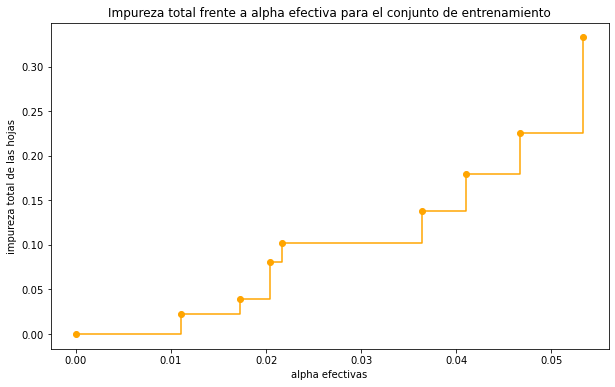

In [28]:
ig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post", color='orange')
ax.set_xlabel("alpha efectivas")
ax.set_ylabel("impureza total de las hojas")
ax.set_title("Impureza total frente a alpha efectiva para el conjunto de entrenamiento")

Ahora, entrenamos un árbol de decisión usando los valores efectivos de alpha. El último valor de *ccp_alphas* es el valor alpha que poda todo el árbol, dejando el árbol con un solo nodo.

In [29]:
arboles_poda = []
for ccp_alpha in ccp_alphas:
    arbol_poda = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    arbol_poda.fit(X_train, y_train)
    arboles_poda.append(arbol_poda)
print("El número de nodos en el último árbol es: {} para ccp_alpha: {}".format(
      arboles_poda[-1].tree_.node_count, ccp_alphas[-1]))

El número de nodos en el último árbol es: 1 para ccp_alpha: 0.08197031752323072


Eliminamos el último elemento de *arbol_poda* y *ccp_alphas* ya que es el árbol formado por un solo nodo.

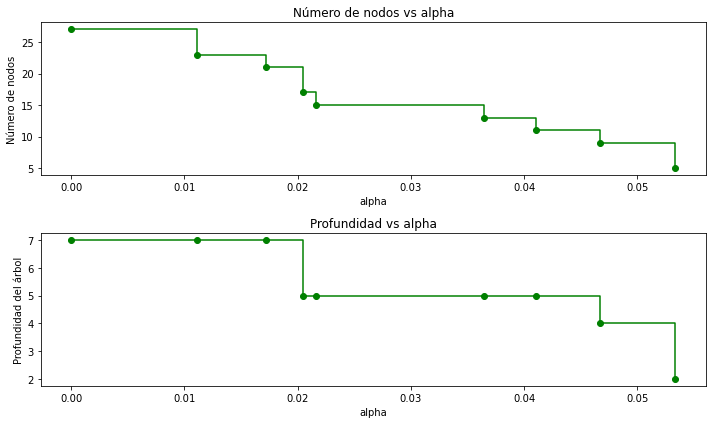

In [30]:
arboles_poda = arboles_poda[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [arbol_poda.tree_.node_count for arbol_poda in arboles_poda]
depth = [arbol_poda.tree_.max_depth for arbol_poda in arboles_poda]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post", color='green')
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Número de nodos")
ax[0].set_title("Número de nodos vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post", color='green')
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Profundidad del árbol")
ax[1].set_title("Profundidad vs alpha")
fig.tight_layout()

Podemos ver comparativamente como el número de nodos y la profunidad del árbol disminuyen a medida que aumenta alpha.

Veamos cómo varía el rendimiento para los distintos valores de alpha:

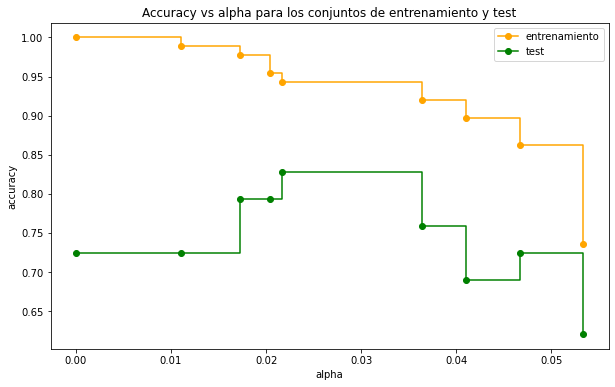

In [31]:
train_scores = [arbol_poda.score(X_train, y_train) for arbol_poda in arboles_poda]
test_scores = [arbol_poda.score(X_test, y_test) for arbol_poda in arboles_poda]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha para los conjuntos de entrenamiento y test")
ax.plot(ccp_alphas, train_scores, marker='o', label="entrenamiento",
        drawstyle="steps-post", color='orange')
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post", color='green')
ax.legend()
plt.show()

Veamos cuál es el mejor valor:

In [32]:
index_best_model = np.argmax(test_scores)
best_model = arboles_poda[index_best_model]
scores_poda = best_model.score(X_test, y_test)
print('Accuracy del mejor modelo en el conjunto de entrenamiento: ',best_model.score(X_train, y_train))
print('Accuracy del mejor modelo en el conjunto test: ',scores_poda)

Accuracy del mejor modelo en el conjunto de entrenamiento:  0.9425287356321839
Accuracy del mejor modelo en el conjunto test:  0.8275862068965517


El rendimiento es del `83%`, luego es una mejora a los anteriores. Veamos también el árbol podado resultante:

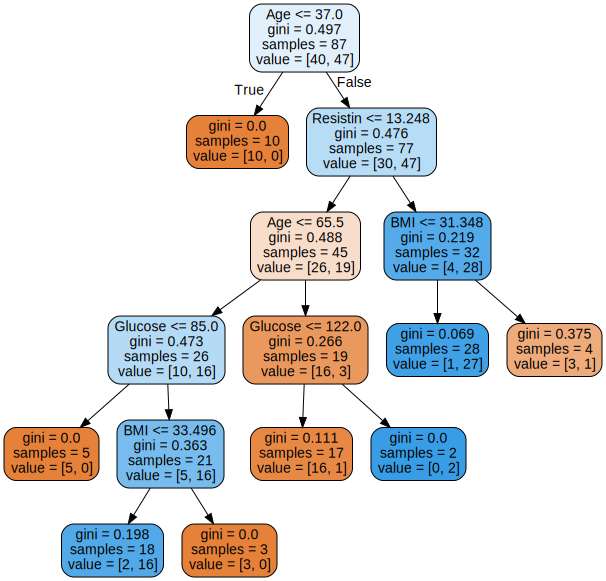

In [33]:
export_graphviz(
    best_model,
    out_file="arbol_2.dot",
    feature_names=X_names,
    rounded=True,
    filled=True)
!dot -Tpng arbol_2.dot -o arbol_2.png
with open("arbol_2.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

Obtenemos un árbol podado de profundidad `6`. Como podemos observar es un árbol mucho más pequeño que el inicial y con un gran rendimiento.

Por último, veamos una tabla resumen de los modelos que hemos usado y sus rendimientos.

In [34]:
from tabulate import tabulate
rend = [['Árbol base', scores_arbol],
         ['Árbol base con validación cruzada sin estratificación', scores_cv],
         ['Árbol base con validación cruzada con estratificación', scores_cv_e],
         ['Árbol podado',scores_poda]]
        
      
print(tabulate(rend, headers=['Modelo', 'Rendimiento']))

Modelo                                                   Rendimiento
-----------------------------------------------------  -------------
Árbol base                                                  0.758621
Árbol base con validación cruzada sin estratificación       0.706944
Árbol base con validación cruzada con estratificación       0.725
Árbol podado                                                0.827586


El árbol podado tiene un rendimiento de `83%`. Es el mejor modelo tanto en efectividad como en tamaño para predecir el cáncer de mama a través de los atributos: Edad, IMC, Glucosa, HOMA, Insulina, Adiponectina, Leptina, Resistina y MCP-1 del set de datos.